<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Image_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
(xtr,ytr),(xts,yts) = fashion_mnist.load_data()

In [2]:

names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(names)

10

In [4]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


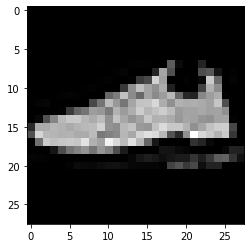

In [24]:
plt.imshow(xtr[55180],cmap='gray')
plt.show()

In [25]:
ytr[55180]

7

In [26]:
names[ytr[55180]]

'Sneaker'

## Preprocessing of data

In [27]:
ytr

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
# for multiclass classification, we need to onehotencode the labels
from tensorflow.keras.utils import to_categorical
ytr = to_categorical(ytr)
print(ytr.shape)
yts = to_categorical(yts)
print(yts.shape)

(60000, 10)
(10000, 10)


In [29]:
# converting images into channel format
print(xtr.shape)
print(xts.shape)

(60000, 28, 28)
(10000, 28, 28)


## modelling of Neural Network

In [30]:
from tensorflow.keras import models,layers

In [32]:
# creating input layer
input_layer = layers.Input(shape=(28,28))

# add a fltten layer, flatten layer flattens the array, e.g. a 5x5 array will be converted to 1x25
# here we are using flatten layer to convert image of shape 28x28 to 1x784 so that each pixel can be fed to next layer
ft = layers.Flatten()(input_layer)

# add the first hidden layer -> full connnected layer where each neuron does weighted sum and activation function. such layers in tensorflow are termed as dense layers
h1 = layers.Dense(200,activation='relu')(ft)

# add the second hidden layer
h2 = layers.Dense(100,activation='relu')(h1)

# add the final output layer
output_layer = layers.Dense(10,activation='softmax')(h2)


model = models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [33]:
# metrics - to check performance of the model e.g. - accuracy, recall, r2 score
# optmizier - the optmizier which will update the weights and bais to minimize the error function, e.g. adam, sgd, RMSProp => we prefer using adam as it tunes learning rate automaticalllu
# loss = how the overall error to be calculated, for regression - mse , for two class classification - binary_crossentropy, for multiclass classification - categorical_crossentropy

model.compile(metrics=['accuracy'],optimizer='adam',loss='categorical_crossentropy')
model.fit(xtr,ytr,epochs=10,batch_size=1000,validation_data=(xts,yts))

Epoch 1/10
60/60 [==============================] - 3s 6ms/step - loss: 14.9010 - accuracy: 0.6726 - val_loss: 3.9205 - val_accuracy: 0.7576
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 2.8561 - accuracy: 0.7793 - val_loss: 2.4687 - val_accuracy: 0.7815
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.9074 - accuracy: 0.7994 - val_loss: 2.0760 - val_accuracy: 0.7708
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.4913 - accuracy: 0.8126 - val_loss: 1.6537 - val_accuracy: 0.7996
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2242 - accuracy: 0.8220 - val_loss: 1.4432 - val_accuracy: 0.8021
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.8254 - val_loss: 1.2215 - val_accuracy: 0.8149
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.8366 - val_loss: 1.1960 - val_accuracy: 0.8115
Epoch 8/10
60/60 [=

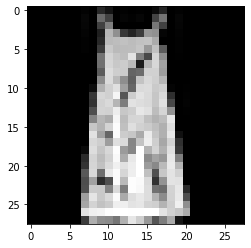

In [40]:
plt.imshow(xts[450],cmap='gray')
plt.show()

In [41]:
prob = model.predict(xts[450].reshape(1,28,28))
np.argmax(prob)

3

In [42]:
names[3]

'Dress'

In [43]:
!wget -q https://cdn.shopify.com/s/files/1/0011/9783/4252/products/20_375a8763-f5d7-4184-a352-4523ef713733_900x.jpg

In [59]:
!wget -q https://s-media-cache-ak0.pinimg.com/736x/f1/2a/28/f12a2840240023960fbfa92dc944a648.jpg

In [60]:
from tensorflow.keras.preprocessing import image
img = image.img_to_array(image.load_img("f12a2840240023960fbfa92dc944a648.jpg",target_size=(28,28),grayscale=True))
img.shape

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(28, 28, 1)

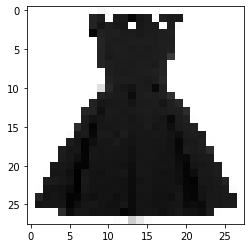

In [61]:
plt.imshow(img.reshape(28,28),cmap='gray')
plt.show()

In [62]:
proba = model.predict(img.reshape(1,28,28))
np.argmax(proba)

6

In [64]:
names[6]

'Shirt'